<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_04_reg_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 04

Jhonatan Jurado Rodríguez

CC 1007241890

Objetivo: Programar una regresión multivariada


1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.
3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.
4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
    $\nabla J$ = \Lambda X.T
  
  - Actualizar los nuevos parametros:
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Punto 1

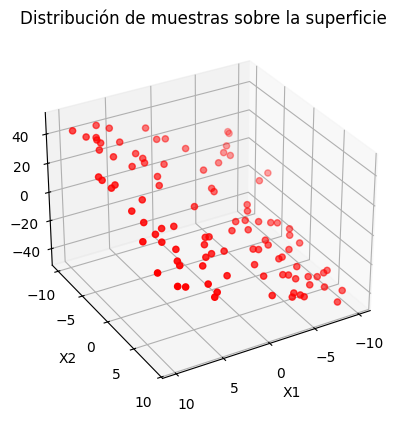

In [8]:
#1
def calcular_superficie(entrada: np.ndarray) -> np.ndarray: # Función que define el plano
    coef_x1, coef_x2 = 2.1, -3.1  # Coeficientes del plano
    salida = (coef_x1 * entrada[0, :] + coef_x2 * entrada[1, :]).reshape(1, -1)
    return salida

def generar_datos_aleatorios(modelo: callable, num_muestras: int) -> tuple: # Generar datos aleatorios en el plano
    coordenada_x1 = np.random.uniform(-10, 10, num_muestras)
    coordenada_x2 = np.random.uniform(-10, 10, num_muestras)

    datos_X = np.vstack([np.ones(num_muestras), coordenada_x1, coordenada_x2])# Construcción de la matriz de datos
    datos_Y = modelo(datos_X[1:, :])

    return datos_X, datos_Y

num_muestras = 100 # Generar los datos
datos_X, datos_Y = generar_datos_aleatorios(calcular_superficie, num_muestras)

figura_3d = plt.figure()
ejes_3d = figura_3d.add_subplot(111, projection='3d')

ejes_3d.scatter(datos_X[1, :], datos_X[2, :], datos_Y, c="red", marker='o')# Graficar los puntos

ejes_3d.set_xlabel('X1')
ejes_3d.set_ylabel('X2')
ejes_3d.set_zlabel('Y')
ejes_3d.set_title('Distribución de muestras sobre la superficie')

ejes_3d.view_init(elev=30, azim=60)

plt.show()


## Punto 2

In [9]:
#2
parametros = np.random.randn(3) #parámetros aleatorios

print(parametros)

[-1.25626708  0.02746611  0.1307614 ]


## Punto 3

In [10]:
#3
num_caracteristicas = 2
num_ejemplos = 100

variable_x1 = np.random.uniform(-10, 10, num_ejemplos)# Generar datos aleatorios
variable_x2 = np.random.uniform(-10, 10, num_ejemplos)

matriz_entrada = np.vstack([np.ones(num_ejemplos), variable_x1, variable_x2])  # Construcción de la matriz de entrada

print("Tamaño de la matriz de entrada:", matriz_entrada.shape)
print("Vista parcial de la matriz:\n", matriz_entrada[:, :5])


Tamaño de la matriz de entrada: (3, 100)
Vista parcial de la matriz:
 [[ 1.          1.          1.          1.          1.        ]
 [-3.13978459  1.98913245  9.42387203 -0.30894535  2.82605199]
 [ 7.43708283 -8.00065569  4.73316895 -5.61514961 -8.39932185]]


## Punto 4

In [11]:
#4
# Obtener los valores de salida desde la función del plano
datos_Y = calcular_superficie(entrada=matriz_entrada[1:, :])

# Inicializar aleatoriamente los parámetros del modelo
parametros_theta = np.random.randn(num_caracteristicas + 1).reshape(1, -1)

# 1. Calcular la hipótesis
hipotesis = parametros_theta @ matriz_entrada  # (1 x 3) @ (3 x 100) = (1 x 100)

# 2. Calcular el error (Diferencia entre la hipótesis y los valores reales)
error_lambda = hipotesis - datos_Y  # (1 x 100) - (1 x 100) = (1 x 100)

# 3. Calcular el error al cuadrado
error_cuadrado = error_lambda ** 2  # (1 x 100)

# 4. Función de coste
costo_J = (1 / (2 * num_ejemplos)) * np.sum(error_cuadrado)  # J es un escalar

# Mostrar los resultados
print("Hipótesis (h):", hipotesis)
print("Error (Lambda):", error_lambda)
print("Error cuadrado (Lambda*):", error_cuadrado)
print("Valor de la función de coste (J):", costo_J)


Hipótesis (h): [[-1.35091878  3.81033737 -5.66968712  3.68685081  3.62821959  2.09815534
   4.60451144 -7.60151398 -3.33824296 -3.75159993 -5.99301406  2.58169917
   4.39953802  1.84812476  0.01238154 -3.97876624 -0.09225801 -4.00246105
  -3.37796652 -2.58592494 -1.47070988  7.98820557  5.09358746  2.7231538
  -1.1255593   1.87938075  3.13016782  3.60717443 -1.21828637 -5.17827281
  -0.98991945 -2.93150602  2.01123914 -7.65595439  6.02251135  0.06633742
  -3.7844578  -3.51872273 -2.74587983  2.08969441 -5.07472989  2.05103976
   4.51611946  4.92546223  0.32307255  1.0720526  -5.35016482  2.29731131
  -0.38976861 -4.88490948 -4.83634374 -0.0164707   0.08403205  5.68874164
   0.20339175  6.73755785  0.82648672  6.22722034  5.80310615  0.24664328
   0.06390677 -0.49400642  2.40209969 -2.04423027 -5.02891246 -1.12578834
  -1.09404967  5.04635295  1.73925566  4.53275748 -3.77918648 -3.17318955
  -5.8414564  -7.87215268  0.08405474 -3.72649886 -3.14278232  5.67892314
   0.69670744  7.1050208

## Punto 5

In [12]:
#5
tasa_aprendizaje = 0.01

gradiente_costo = (1 / num_ejemplos) * (error_lambda @ matriz_entrada.T)  # (1 x 100) @ (100 x 3) # gradiente de la función de costo

parametros_theta_actualizados = parametros_theta - tasa_aprendizaje * gradiente_costo # Actualizar los parámetros usando descenso de gradiente

print("Parámetros iniciales (Theta):", parametros_theta)
print("Parámetros actualizados (Nuevo Theta):", parametros_theta_actualizados)
print("Gradiente de la función de costo (Grad J):", costo_J)


Parámetros iniciales (Theta): [[ 0.83600285 -0.44771651 -0.48307315]]
Parámetros actualizados (Nuevo Theta): [[ 0.82725046  0.24419426 -1.2481699 ]]
Gradiente de la función de costo (Grad J): 188.6155877541957


## Punto 6

In [13]:
#6

# Reunir todas las definiciones previas

# Definir cantidad de características y ejemplos
num_caracteristicas = 2
num_ejemplos = 100

# Generar datos aleatorios
variable_x1 = np.random.uniform(-10, 10, num_ejemplos)
variable_x2 = np.random.uniform(-10, 10, num_ejemplos)

# Construcción de la matriz de entrada
matriz_entrada = np.vstack([np.ones(num_ejemplos), variable_x1, variable_x2])  # (3 x 100)

# Obtener los valores de salida desde la función del plano
datos_Y = calcular_superficie(entrada=matriz_entrada[1:, :])  # (1 x 100)

# Inicializar los parámetros theta aleatoriamente
parametros_theta = np.random.randn(num_caracteristicas + 1).reshape(1, -1)

# Definir tasa de aprendizaje y tolerancia
tasa_aprendizaje = 0.01
tolerancia_error = 1e-6

# Inicializar el valor de cambio en Theta
cambio_parametros = np.inf  # Se inicia con un valor grande
max_iteraciones = 10000  # Límite máximo de iteraciones
contador_iteraciones = 0

# Bucle de optimización
while cambio_parametros > tolerancia_error and contador_iteraciones < max_iteraciones:
    # Calcular la hipótesis
    hipotesis = parametros_theta @ matriz_entrada  # (1 x 3) @ (3 x 100) = (1 x 100)

    # Calcular el error
    error_lambda = hipotesis - datos_Y  # (1 x 100)

    # Calcular el gradiente
    gradiente_costo = (1 / num_ejemplos) * (error_lambda @ matriz_entrada.T)  # (1 x 100) @ (100 x 3) = (1 x 3)

    # Actualizar los parámetros theta
    parametros_theta_actualizados = parametros_theta - tasa_aprendizaje * gradiente_costo

    # Medir el cambio en los parámetros
    cambio_parametros = np.linalg.norm(parametros_theta_actualizados - parametros_theta)  # Norma L2

    # Actualizar valores
    parametros_theta = parametros_theta_actualizados
    contador_iteraciones += 1

# Mostrar los resultados finales
print(f"Convergencia alcanzada después de {contador_iteraciones} iteraciones")
print(f"Parámetros finales Theta: {parametros_theta}")


Convergencia alcanzada después de 913 iteraciones
Parámetros finales Theta: [[-9.92865085e-05  2.09999974e+00 -3.09999854e+00]]
